In [0]:
# get more ram
a = []
while(1):
    a.append(1)

In [18]:
import glob
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import os
import time

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image

tf.__version__


'2.2.0-rc2'

In [2]:
! python -m tensorboard.main --logdir=/path/to/logs 

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.2.0 at http://localhost:6006/ (Press CTRL+C to quit)


In [3]:
import numpy as np
import glob
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os
#%tensorflow_version 1.x
from PIL import Image
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras.utils.vis_utils import plot_model  #plotting the model structure
from keras import callbacks
from datetime import datetime
import os
import cv2
import string
import numpy as np


from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import warnings
warnings.filterwarnings('ignore')
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint


from keras import layers        # functional 
from keras.models import Model
from keras.models import load_model
from keras import callbacks
import cv2
import string
import numpy as np

from packaging import version
import tensorflow as tf
from tensorflow import keras

Using TensorFlow backend.


In [4]:
! wget "https://ndownloader.figshare.com/files/22279800" -O faded_train_001.tar.gz
! wget "https://ndownloader.figshare.com/files/22279818" -O faded_train_002.tar.gz
! wget "https://ndownloader.figshare.com/files/22279845" -O faded_train_003.tar.gz
! wget "https://ndownloader.figshare.com/files/22285509" -O faded_train_004.tar.gz
! wget "https://ndownloader.figshare.com/files/22285563" -O faded_train_005.tar.gz
! wget "https://ndownloader.figshare.com/files/22285701" -O faded_train_006.tar.gz
! wget "https://ndownloader.figshare.com/files/22286208" -O faded_train_007.tar.gz
! wget "https://ndownloader.figshare.com/files/22293534" -O faded_train_008.tar.gz
! wget "https://ndownloader.figshare.com/files/22293714" -O faded_test_001.tar.gz
! wget "https://ndownloader.figshare.com/files/22293813" -O faded_test_002.tar.gz


--2020-04-14 12:52:11--  https://ndownloader.figshare.com/files/22279800
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 52.212.2.22, 34.249.45.252, 34.249.48.57, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|52.212.2.22|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22279800/faded_train_001.tar.gz [following]
--2020-04-14 12:52:12--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22279800/faded_train_001.tar.gz
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.88.187
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.88.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 419620222 (400M) [application/gzip]
Saving to: ‘faded_train_001.tar.gz’

faded_train_001.tar 100%[===================>] 400.18M  29.1MB/s    in 15s     

2020-04-14 12:52:27 (27.5 MB/s) - ‘faded_train_001.tar.gz

In [5]:
!tar -xvf faded_train_001.tar.gz > /dev/null
!tar -xvf faded_train_002.tar.gz > /dev/null
!tar -xvf faded_train_003.tar.gz > /dev/null
!tar -xvf faded_train_004.tar.gz > /dev/null
!tar -xvf faded_train_005.tar.gz > /dev/null
!tar -xvf faded_train_006.tar.gz > /dev/null
!tar -xvf faded_train_007.tar.gz > /dev/null
!tar -xvf faded_train_008.tar.gz > /dev/null
!tar -xvf faded_test_001.tar.gz > /dev/null
!tar -xvf faded_test_002.tar.gz > /dev/null
! echo "Untaring... done..."

Untaring... done...


In [0]:
! mkdir data
! find faded_train_001 -name '*.*' | xargs mv --target-directory=data
! find faded_train_002 -name '*.*' | xargs mv --target-directory=data
! find faded_train_003 -name '*.*' | xargs mv --target-directory=data
! find faded_train_004 -name '*.*' | xargs mv --target-directory=data
! find faded_train_005 -name '*.*' | xargs mv --target-directory=data
! find faded_train_006 -name '*.*' | xargs mv --target-directory=data
! find faded_train_007 -name '*.*' | xargs mv --target-directory=data
! find faded_train_008 -name '*.*' | xargs mv --target-directory=data
! find faded_test_001 -name '*.*' | xargs mv --target-directory=data
! find faded_test_002 -name '*.*' | xargs mv --target-directory=data

In [0]:
# # terribly slow
# ! ulimit -S -s unlimited
# ! mkdir data
# ! mv faded_train_001/* data
# ! mv faded_train_002/* data
# ! mv faded_train_003/* data
# ! mv faded_train_004/* data
# ! mv faded_train_005/* data
# ! mv faded_train_006/* data
# ! mv faded_train_007/* data
# ! mv faded_train_008/* data
# ! mv faded_test_001/* data
# ! mv faded_test_002/* data
# ! echo "Moving done"

In [8]:
! du -hs faded_train_003

5.0M	faded_train_003


In [9]:
! du -hs data

4.8G	data


In [0]:
# DATA_DIR = '/home/jackon/captcha-tensorflow/images/char-4-epoch-6/train'  # 30241 images. validate accuracy: 87.6%
DATA_DIR = 'data'  # 302410 images. validate accuracy: 98.8%
H, W, C = 100, 120, 3
N_LABELS = 10
D = 4

In [0]:
def parse_filepath(filepath):
    try:
        path, filename = os.path.split(filepath)
        filename, ext = os.path.splitext(filename)
        label, _ = filename.split("_")
        return label
    except Exception as e:
        print('error to parse %s. %s' % (filepath, e))
        return None, None

In [12]:
# create a pandas data frame of images, age, gender and race
files = glob.glob(os.path.join(DATA_DIR, "*.png"))
attributes = list(map(parse_filepath, files))

df = pd.DataFrame(attributes)
df['file'] = files
df.columns = ['label', 'file']
df = df.dropna()
df.head()

,label,file
0,7409,data/7409_ce6e998e-cbe3-41ca-99f9-f7e9ba044c8d...
1,0832,data/0832_1a48ff7f-d2b8-4c65-8d9e-ee178511799c...
2,7264,data/7264_bfd795b9-3366-40d7-9c45-cc3e81ba09ab...
3,2945,data/2945_137b7c09-6bc2-4860-9252-13586fd8a9fa...
4,5073,data/5073_f8ae4c34-56ed-4f12-a352-ecf49656da3d...


In [13]:
p = np.random.permutation(len(df))
train_up_to = int(len(df) * 0.95)
train_idx = p[:train_up_to]
test_idx = p[train_up_to:]

# split train_idx further into training and validation set
train_up_to = int(train_up_to * 0.95)
train_idx, valid_idx = train_idx[:train_up_to], train_idx[train_up_to:]

print('train count: %s, valid count: %s, test count: %s' % (
    len(train_idx), len(valid_idx), len(test_idx)))

train count: 545832, valid count: 28728, test count: 30240


In [0]:
from tensorflow.keras.utils import to_categorical
from PIL import Image


def get_data_generator(df, indices, for_training, batch_size=16):
    images, labels = [], []
    while True:
        for i in indices:
            r = df.iloc[i]
            file, label = r['file'], r['label']
            im = Image.open(file)
            im = im.resize((H, W))
            im = np.array(im) / 255.0
            images.append(np.array(im))
            labels.append(np.array([np.array(to_categorical(int(i), N_LABELS)) for i in label]))
            if len(images) >= batch_size:
#                 print(np.array(images), np.array(labels))
                yield np.array(images), np.array(labels)
                images, labels = [], []
        if not for_training:
            break

In [19]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalMaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

input_layer = tf.keras.Input(shape=(H, W, C))
x = layers.Conv2D(32, 3, activation='relu')(input_layer)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
#x = layers.Dropout(0.3)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(D * N_LABELS, activation='softmax')(x)
x = layers.Reshape((D, N_LABELS))(x)

model = models.Model(inputs=input_layer, outputs=x)

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics= ['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100, 120, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 118, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 59, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 13, 64)        0     

In [0]:
#from keras.utils.vis_utils import plot_model  #plotting the model structure
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,dpi=60)

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime


batch_size = 1024
valid_batch_size = 64
train_gen = get_data_generator(df, train_idx, for_training=True, batch_size=batch_size)
valid_gen = get_data_generator(df, valid_idx, for_training=True, batch_size=valid_batch_size)

callbacks = [
    ModelCheckpoint("./model_checkpoint", monitor='val_loss')
]
# for storing logs into tensorboard
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(train_gen,
                    steps_per_epoch=len(train_idx)//batch_size,
                    epochs=10,
                    callbacks=[tensorboard_callback,callbacks],
                    validation_data=valid_gen,
                    validation_steps=len(valid_idx)//valid_batch_size)

Epoch 1/10
533/533 [==============================] - ETA: 0s - loss: 0.7903 - accuracy: 0.7337WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./model_checkpoint/assets
533/533 [==============================] - 986s 2s/step - loss: 0.7903 - accuracy: 0.7337 - val_loss: 0.1876 - val_accuracy: 0.9471
Epoch 2/10
533/533 [==============================] - 936s 2s/step - loss: 0.2066 - accuracy: 0.9342 - val_loss: 0.0872 - val_accuracy: 0.9753
Epoch 3/10
533/533 [==============================] - 927s 2s/step - loss: 0.1302 - accuracy: 0.9586 - val_loss: 0.0621 - val_accuracy: 0.9815
Epoch 4/10
533/533 [==============================] - 930s 2s/step - 

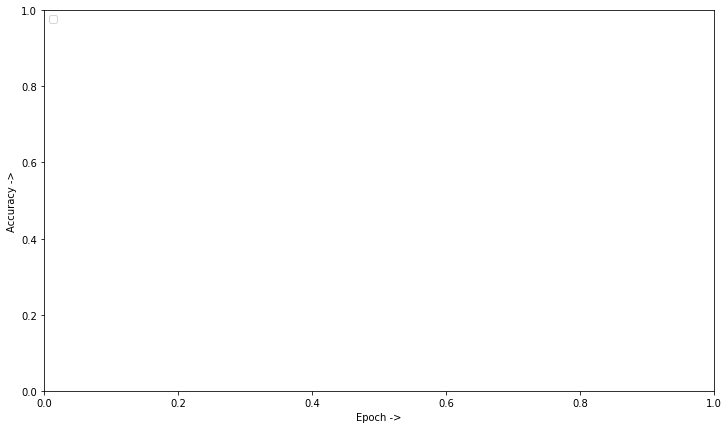

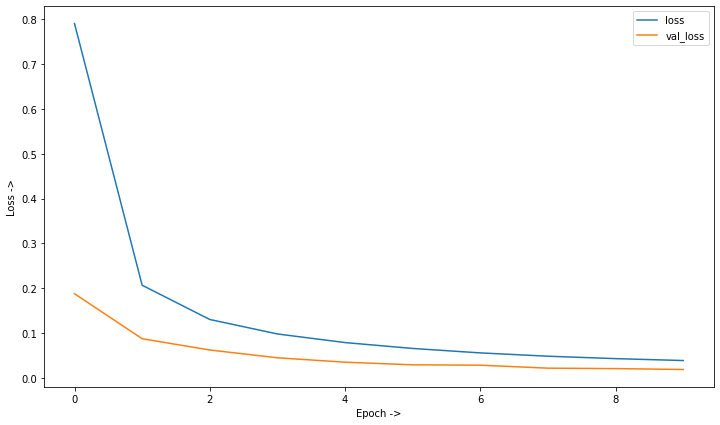

In [24]:
plt.figure(figsize=(12,7))
legend_acc = []
for item in history.history.keys():
  if item.split('_')[-1:] == ['acc']:
    #print("Accuracy = ",item)
    legend_acc.append(item)
    plt.plot(history.history[item])
plt.ylabel('Accuracy ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper left')
plt.show()

plt.figure(figsize=(12,7))
legend_acc = []
for item in history.history.keys():
  if item.split('_')[-1:] == ['loss']:
    #print("Accuracy = ",item)
    legend_acc.append(item)
    plt.plot(history.history[item])
plt.ylabel('Loss ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper right')
plt.show()

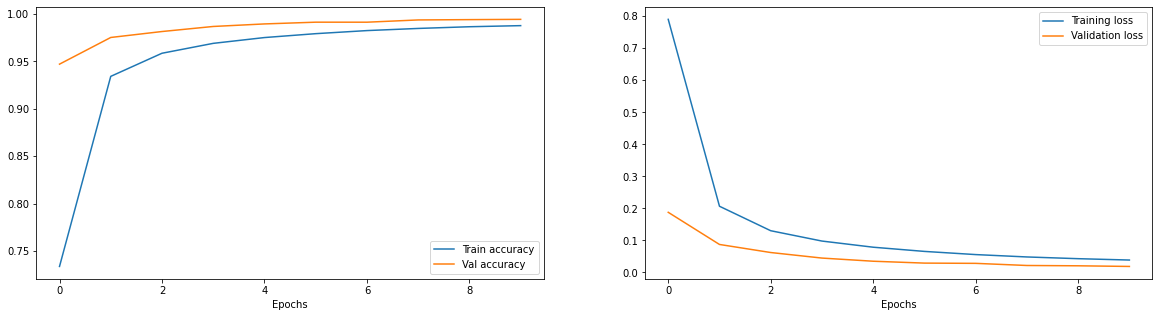

In [25]:
def  plot_train_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].plot(history.history['accuracy'], label='Train accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Val accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].legend() 

    axes[1].plot(history.history['loss'], label='Training loss')
    axes[1].plot(history.history['val_loss'], label='Validation loss')
    axes[1].set_xlabel('Epochs')
    axes[1].legend()

plot_train_history(history)

In [0]:
# download the model in computer for later use

model.save('faded_captcha.h5')


In [27]:
# download the model from colab
from google.colab import files
files.download('faded_captcha.h5')

KeyboardInterrupt: ignored

In [0]:
# https://www.tensorflow.org/tensorboard/graphs
%tensorboard --logdir logs

In [28]:
test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=128)
dict(zip(model.metrics_names, model.evaluate(test_gen, steps=len(test_idx)//128)))

236/236 [==============================] - 51s 215ms/step - loss: 0.0180 - accuracy: 0.9947


{'accuracy': 0.9946951270103455, 'loss': 0.01801893301308155}

In [29]:
test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=128)
x_test, y_test = next(test_gen)

y_pred = model.predict_on_batch(x_test)

y_true = tf.math.argmax(y_test, axis=-1)
y_pred = tf.math.argmax(y_pred, axis=-1)

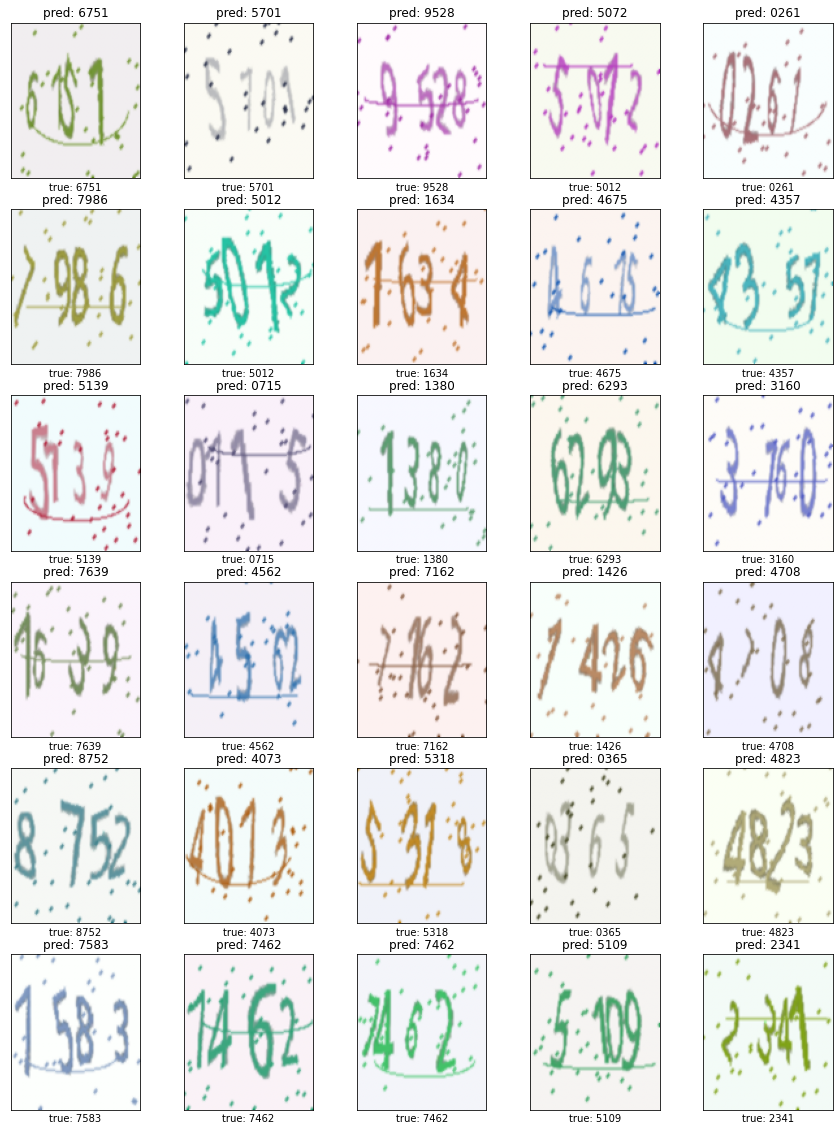

In [33]:
import math
n = 30
random_indices = np.random.permutation(n)
n_cols = 5
n_rows = math.ceil(n / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
for i, img_idx in enumerate(random_indices):
    ax = axes.flat[i]
    ax.imshow(x_test[img_idx])
    ax.set_title('pred: {}'.format(
        ''.join(map(str, y_pred[img_idx].numpy()))))
    ax.set_xlabel('true: {}'.format(
        ''.join(map(str, y_true[img_idx].numpy()))))
    ax.set_xticks([])
    ax.set_yticks([])

In [0]:
import numpy as np
import random
import math
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.gridspec as gridspec
from tensorflow.keras.preprocessing.image import ImageDataGenerator

successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
# horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
# human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
# img_path = random.choice(horse_img_files + human_img_files)
img_path = png_files[0]



img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
img = cv2.resize(thresh, (200,70), interpolation = cv2.INTER_AREA)


#img = cv2.resize(img, (200,60), interpolation = cv2.INTER_AREA)
#ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
# firstly perform erosion
#erosion = cv2.erode(thresh,kernel,iterations = 2)
# perform dialation
#dialate = cv2.dilate(erosion,kernel,iterations = 1)

#print(pred)
#image_bckup = dialate.copy()
# img = cv2.resize(img, (200,50), interpolation = cv2.INTER_AREA)
# ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
# # firstly perform erosion
# erosion = cv2.erode(thresh,kernel,iterations = 1)
# # perform dialation
# dialate = cv2.dilate(erosion,kernel,iterations = 1)
# img = dialate.copy()

img = img / 255.0
#plt.imshow(img,cmap='gray')
img = np.reshape(img, (200, 70, 1))


x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)



plt.imshow(x.reshape((70,200)), cmap='viridis')

# img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
# #img_res = cv2.resize(img, (300, 300), interpolation = cv2.INTER_AREA) 
# #img = load_img(img_path, target_size=(50, 200))  # this is a PIL image
# x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
# x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
# x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
dumy = 0
h1 = 0
w1 = 0
# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    size2 = feature_map.shape[2]
    # We will tile our images in this matrix
    width = 20*20
    height = 8*20
    if dumy < 8*4:
      plt.figure(figsize=(width,height))
    else:
      height = 8
      width = 20
      plt.figure(figsize=(height,width))
    #fig.subplots_adjust(hspace=0.04, wspace=0.04)
    #display_grid = np.zeros((size, size * n_features))
    count = 1
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      #ax = fig.add_subplot(int(n_features/4), int(n_features/4), count)
      
      plt.subplot(int(n_features/4), int(n_features/4), count)
      plt.subplots_adjust(hspace = .0001)
      plt.axis("off")
      y = x.copy()
      if dumy<8*4: #4
        plt.imshow(y.reshape((x.shape[1],x.shape[0])), cmap='viridis')
        h1 = x.shape[1]
        w1 = x.shape[0]
        dumy += 1
      else:
        y = cv2.resize(x, (h1,w1), interpolation = cv2.INTER_AREA)
        plt.imshow(y, cmap='viridis')
      count += 1
  #print(x.shape)
  #break

#plt.show()
print(png_files[0])